<a href="https://colab.research.google.com/github/aksharakandimalla/dmv-assignment/blob/main/m2_3_7_Multivariate_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are now going to look at multivariate outlier detection. What we mean by multivariate outlier detection is the use of more than one variable to identify an outlier. In univariate outlier detection we looked for individual outliers in a single variable. These univariate outliers may not show up if there are unusual combinations between 2 or more variables. This is where multivatriate outlier detiection comes in. The same principles as mentioned  in univariate outlier detection can be applied with multivariate outliers. In otherwords don't exclude particular rows of data unless you scientific evidence to support this.</br>
</br>


There are numerous approaches to multivariate outlier detection, some of which are outlined below:


*   Bivariate Charts 
> * Based on bivariate Normal assumptions
*   Depth Based control charts (nonparameteric)
> * Map n-dimensional data to one dimension using for example Mahalanobis
> * Build Control Charts for depth

* Mutiscale process control wavelets
> * Detects abnormalities at multiple scales as large wavelett coefficients
> * Useful for data with hetroscedasticity
> * Used in chemical process control

In this section we will specifically focus on the depth based control charts as it is a reasonably reboust process and is quite quick to set-up. The Multiscale process are beyond this material at this stage.

We will need the following three python libaries.

In [ ]:
!pip install pyspc
!pip install matplotlib
!pip install spm1d


  Created wheel for pyspc: filename=pyspc-0.4-cp36-none-any.whl size=30878 sha256=5bb8fc5639ec18cb462a30501054b208f9c7883c26b27871cd3708faa43baebe
  Stored in directory: /root/.cache/pip/wheels/bf/03/f8/b15370eb2f37f1fbc6b921ce1460d94f81f6cb648926086991
Successfully built pyspc
     |████████████████████████████████| 8.5MB 2.5MB/s 


Now lets load the boston housing data that we used in the univariate approach.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.neighbors import DistanceMetric as DM
import numpy as np
import pandas as pd
boston = load_boston()

#print(boston.DESCR)
x = boston.data
y = boston.target
#print(pd.Series(y))
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
#boston_df['Y']=pd.Series(y)
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we will use *pyspc* to get a very quick univariate look of a multivariate dataset. In other words we are going to get all the relevant variables and combine them to reduce them to a single variable that will represent all the variables. The piece of code below uses Hotelling T-Square as a guide to tells is the multivariate point is an outlier.  

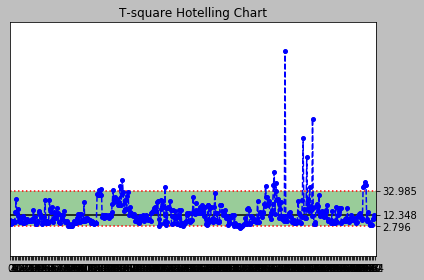

<pyspc: (-9223363271718649235)>


In [ ]:
#X = [[0, 1, 2],[3, 4, 5]]
#print(boston_df.columns)
x=boston_df.values.tolist()
#print(boston_df.values.tolist())

from pyspc import *

a = spc(x) + Tsquare_single()

print(a)



You will see from the chart above that we have a number of outliers, points > 32.985. But the problem from a coding perspective is that *pyspc* doesn't give us the distances for each individual row from the overall multivariare average. We need these distances to tells us which points are outliers. This is where were the library [*scipy.spatial*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html)  comes in. This library calculates the Mahalanobis distance and then compares this to values for a hotellings t squared distribution to deterimine if they are outliers. Its like comparing a single univariate variable to a t-distribution. Have a look at this [link](https://en.wikipedia.org/wiki/Hotelling%27s_T-squared_distribution) to understand this better. The code below is an example for the boston dataset of how to calculate the critical Hotellings T Squared value for the dataset. So any values whoes distance is greater than our critical value will be considered outliers.


In [ ]:
from scipy.stats import f

x=boston_df.values.tolist()
#print(x))
n=len(x)
k=len(x[0])
vals = f.ppf([0.99], n, k)*(n*k)/((n-k)+1)
print(vals)
rv = f(len(x), len(x[0]))

[44.58883096]


The final piece of code tries to put all this together. We have found our crtical values by calcualting the Hotellings T-Squared from n rows with k columns. We then calcualte the Mahalanobis distance for each row from the overall multivariate mean $\bar{X}$ (xbar). Use this distance with the covariance matrix to calculate individual Hotelling T Squared statistics and  then compare each one to the critical Hotellings T Squared values. You will notice that we have used the covariance matrix to helps us standarised the data using *pandas.cov*. There will be small differences between the chart above and the one below as we do not have the exact calculations from *pyspc* but by using the code below we can identify the outlier points.

[44.58883096]
         CRIM   ZN  INDUS  CHAS  ...       B  LSTAT   hotelling  critical value
214   0.28955  0.0  10.59   0.0  ...  348.93  29.55   59.984512       44.588831
365   4.55587  0.0  18.10   0.0  ...  354.70   7.12  158.090914       44.588831
367  13.52220  0.0  18.10   0.0  ...  131.42  13.33   44.762970       44.588831
380  88.97620  0.0  18.10   0.0  ...  396.90  17.21  341.911013       44.588831
405  67.92080  0.0  18.10   0.0  ...  384.97  22.98   85.027030       44.588831
410  51.13580  0.0  18.10   0.0  ...    2.60  10.11   66.700990       44.588831
418  73.53410  0.0  18.10   0.0  ...   16.45  20.62  101.347783       44.588831
490   0.20746  0.0  27.74   0.0  ...  318.43  29.68   46.886323       44.588831

[8 rows x 15 columns]


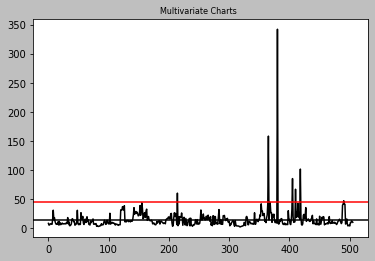

In [ ]:
from  scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
#print(boston_df.cov())
inv_cov = pd.DataFrame(np.linalg.pinv(boston_df.cov().values), boston_df.cov().columns, boston_df.cov().index).values.tolist()
x=boston_df.values.tolist()
xbar=boston_df.mean().tolist()

n=len(x)
k=len(x[0])
## Convert f value to hotellings critical value at 1% level
##https://en.wikipedia.org/wiki/Hotelling%27s_T-squared_distribution

Hotvalue = f.ppf([0.99], n, k)*(n*k)/((n-k)+1)
print(Hotvalue)

## calculating hoteling test statistic for each row in boston dataset 

for i in range(0,len(x)):
  
  boston_df.loc[boston_df.index==i,'hotelling']=(n*k)*distance.mahalanobis(x[i], xbar, inv_cov)**2/(k*(n-k))
  boston_df.loc[boston_df.index==i,'critical value']=Hotvalue

x=np.array(boston_df.index.tolist())
y1=np.array(boston_df['hotelling'])
f = plt.figure()

ax = f.add_subplot(111)

plt.plot(x, y1)
plt.axhline(y=boston_df['hotelling'].mean())
plt.axhline(y=Hotvalue,color='r')
#plt.axhline(y=boston_df['hotelling'].mean()+3*boston_df['hotelling'].std(),color='r')
#plt.axhline(y=boston_df['hotelling'].mean()-3*boston_df['hotelling'].std(),color='r')

plt.title('Multivariate Charts  ', fontsize=8)
print(boston_df.loc[boston_df['hotelling']>boston_df['critical value']])

You should be able to use this depth based approach to help you identify multivariate outliers. It is worth looking at this [article](https://onlinelibrary.wiley.com/doi/full/10.1002/cem.2763) from Richard Brereton if you want more detail. The code I have developed above is based on this paper.</br></br>
Finally, play with the data and test out for yourself if you can find or identify new outliers that you may create. Share your conclusions amongst the class. 
